In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data
from src.models import *
from src.trainer import Trainer
import matplotlib.pyplot as plt
import numpy as np

## Params

In [2]:
nb_epochs = 5
n_cv = 1

In [3]:
# keep best weight

In [4]:
best_weight = 0.6

In [5]:
weight_aux = best_weight

In [6]:
test_accuracies = []
train_losses = []
train_accuracies = []
validation_accuracies = []

In [7]:
# confused

In [8]:
for i in range(n_cv):
    dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)
    le_net = LeNet()
    tail_net = TailLinear(label_encoded=True)
    siamese_le_net = Siamese(le_net, 
                            target=tail_net, 
                            weight_aux=best_weight,
                            strategy='sum',
                            softmax=False,
                            argmax=True)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies.append(acc_test)

# Epoch 1/5:	 loss=1.81	 loss_val=0.68	 acc_val=56.25
# Epoch 2/5:	 loss=1.08	 loss_val=0.59	 acc_val=73.66
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-e1e8623e58af>", line 12, in <module>
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
  File "/Users/jodok/02 Code/EE-559-Team/Project1/src/trainer.py", line 51, in fit
    for batch_idx, batch in enumerate(dl_val):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 345, in __next__
    data = self._next_data()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/

KeyboardInterrupt: 

In [ ]:
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev test acc', stdev_test_acc)

In [9]:
import numpy as np 
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)

In [10]:
from src.utils import plot_training_epochs

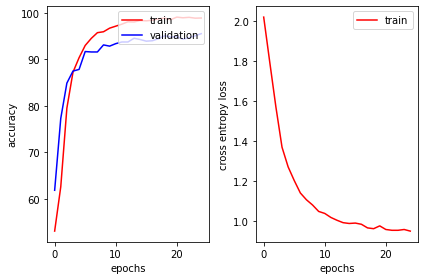

In [11]:
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies, validation_accuracies)